In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('Pearl.jpg', cv2.IMREAD_GRAYSCALE)

In [16]:
print('Image Matrix')
print(image)

Image Matrix
[[34 25 27 ... 30 31 32]
 [32 30 33 ... 25 26 28]
 [28 30 34 ... 27 27 27]
 ...
 [30 30 28 ... 33 29 23]
 [32 25 30 ... 33 27 28]
 [31 23 28 ... 41 35 36]]


In [ ]:
frequencies = np.zeros(256).astype('int32')
w, h = image.shape
for i in range(w):
  for j in range(h):
    frequencies[image[i, j]] += 1
intensity_levels = np.arange(frequencies.shape[0], step= 1)

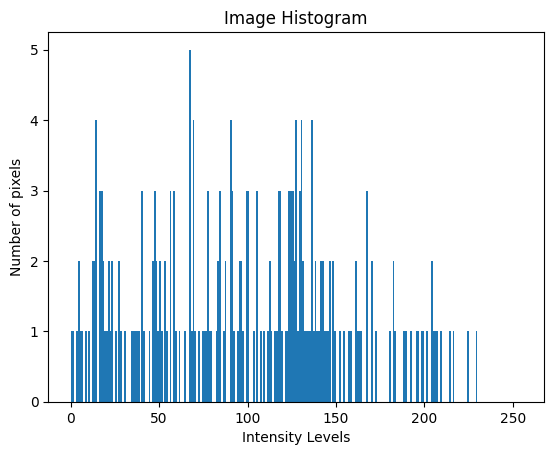

In [ ]:
plt.hist(frequencies, bins= intensity_levels)
plt.title('Image Histogram')
plt.xlabel('Intensity Levels')
plt.ylabel('Number of pixels')
plt.show()

In [ ]:
px_count = w * h
max_intensity = 255
running_sum = frequencies / px_count
hist_eq = np.zeros_like(running_sum).astype('int8')

for i in range(1, max_intensity + 1):
  running_sum[i] += running_sum[i - 1]
  hist_eq[i] = round(running_sum[i] * i)
  if i < 10:
    print(hist_eq[i])

0
0
0
0
0
0
0
0
0


In [ ]:
hist_eq[10:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 4, 5, 6, 7],
      dtype=int8)

In [ ]:
blurred_image = cv2.imread('blurred.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
hist_img = image
for i in range(w):
  for j in range(h):
    hist_img[i, j] = hist_eq[image[i, j]]

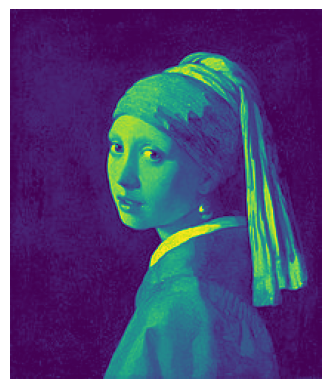

In [ ]:
plt.imshow(hist_img, cmap= 'gray')
plt.title('Image after hist equalization')
plt.axis('off')
plt.show()

In [ ]:
eq_freq = np.zeros(256).astype('int32')
for i in range(w):
  for j in range(h):
    eq_freq[image[i, j]] += 1

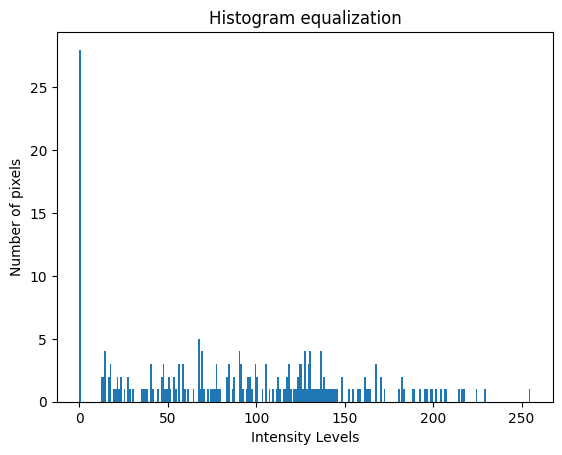

In [ ]:
plt.hist(eq_freq, bins= intensity_levels)
plt.title('Histogram equalization')
plt.xlabel('Intensity Levels')
plt.ylabel('Number of pixels')
plt.show()

In [ ]:
def sobel_gradient(image):
  sobel_x = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])
  sobel_y = np.array([[1, 0, 1],
                      [2, 0, -2],
                      [1, 0, -1]])
  gx = cv2.filter2D(image, cv2.CV_64F, sobel_x)
  gy = cv2.filter2D(image, cv2.CV_64F, sobel_y)
  plt.imshow(gx, cmap= 'gray')
  plt.title('x gradient')
  plt.axis('off')
  plt.show()
  plt.imshow(gy, cmap= 'gray')
  plt.title('y gradient')
  plt.axis('off')
  plt.show()
  grad_mag = np.sqrt(gx ** 2 + gy ** 2)
  return grad_mag


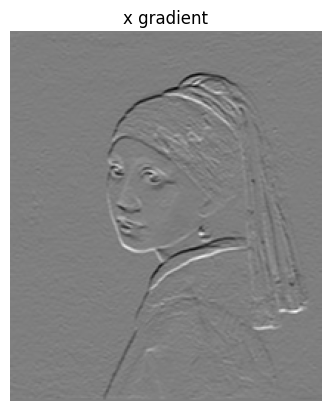

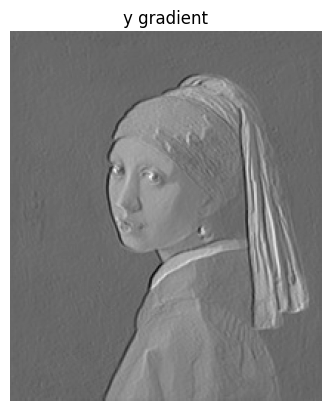

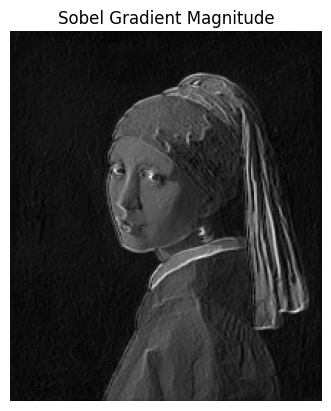

In [ ]:
sobel_grad = sobel_gradient(image)
plt.imshow(sobel_grad, cmap= 'gray')
plt.title('Sobel Gradient Magnitude')
plt.axis('off')
plt.show()

In [14]:
def second_order_derivative(img):
  kernel = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])
  derived_img = cv2.filter2D(img, cv2.CV_64F, kernel)
  return derived_img

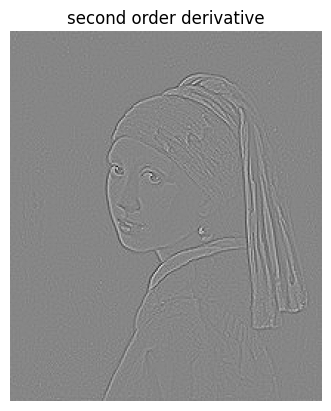

In [15]:
sec_derivative = second_order_derivative(image)
plt.imshow(sec_derivative, cmap= 'gray')
plt.title('second order derivative')
plt.axis('off')
plt.show()

In [5]:
def gaussian_filter(img):
  kernel = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])
  gauss_image = cv2.filter2D(img, cv2.CV_64F, kernel)
  plt.imshow(gauss_image, cmap= 'gray')
  plt.title('Gaussian Filter')
  plt.axis('off')
  plt.show()

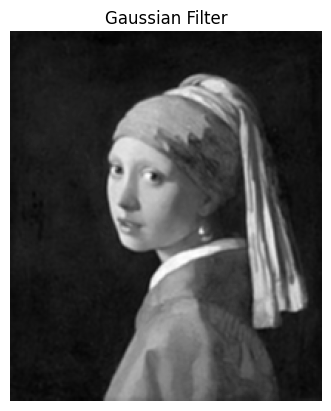

In [6]:
gaussian_filter(image)

In [10]:
def first_order_derivative(img):
  kernel = np.array([[-1, 0, 1]])
  fx = cv2.filter2D(img, cv2.CV_64F, kernel)
  plt.imshow(fx, cmap= 'gray')
  plt.title('First order derivative')
  plt.axis('off')
  plt.show()

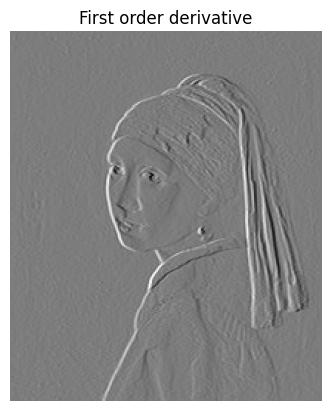

In [13]:
first_order_derivative(image)

In [17]:
!git remote add origin https://github.com/chandankalyan/cvlab.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
